# References

[What does R^2 mean?](http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit)

[Reference for this notebook](https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/)

[About statsmodels](https://www.statsmodels.org/stable/index.html)

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

/Applications/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
root = 'https://raw.githubusercontent.com/LearnDataSci/article-resources/master/Housing%20Price%20Index%20Regression'

housing_price_index = pd.read_csv(root + '/monthly-hpi.csv')
unemployment = pd.read_csv(root + '/unemployment-macro.csv')
federal_funds_rate = pd.read_csv(root + '/fed_funds.csv')
shiller = pd.read_csv(root + '/shiller.csv')
gross_domestic_product = pd.read_csv(root + '/gdp.csv')

In [3]:
# housing_price_index

In [4]:
# merge dataframes into single dataframe by date
df = (shiller.merge(housing_price_index, on='date')
                    .merge(unemployment, on='date')
                    .merge(federal_funds_rate, on='date')
                    .merge(gross_domestic_product, on='date'))

In [5]:
df.head()

,date,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,2011-01-01,1282.62,220.22,3.39,181.35,16.2,8393,2800,6816,6.5,60.1,0.17,5766.7,64.2,192.7,14881.3
1,2011-04-01,1331.51,224.91,3.46,180.80,16.1,8016,2466,6823,6.8,59.4,0.10,5870.8,64.2,203.1,14989.6
2,2011-07-01,1325.19,225.92,3.00,184.25,15.9,8177,2785,6850,6.8,59.2,0.07,5802.6,64.0,204.6,15021.1
3,2011-10-01,1207.22,226.42,2.15,181.51,15.8,7802,2555,6917,8.0,57.9,0.07,5812.9,64.1,201.1,15190.3
4,2012-01-01,1300.58,226.66,1.97,179.13,15.2,7433,2809,7022,7.4,57.1,0.08,5765.7,63.7,200.7,15291.0


In [6]:
df.tail()

,date,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
18,2015-07-01,2094.14,238.65,2.32,227.98,10.3,3359,1927,7239,10.4,49.6,0.13,6157.8,62.6,193.9,16454.9
19,2015-10-01,2024.81,237.84,2.07,227.71,9.8,3344,1916,7377,9.7,49.7,0.12,6146.6,62.5,187.5,16490.7
20,2016-01-01,1918.60,236.92,2.09,227.45,9.9,3234,2089,7470,9.9,47.6,0.34,6219.7,62.7,182.6,16525.0
21,2016-04-01,2075.54,239.26,1.81,235.18,9.7,3340,1715,7416,10.9,48.8,0.37,6219.3,62.8,183.2,16583.1
22,2016-07-01,2148.90,240.65,1.50,241.59,9.7,3175,1950,7442,10.9,48.4,0.39,6307.5,62.8,187.7,16727.0


In [7]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~

housing_model = ols("housing_price_index ~ total_unemployed", data=df).fit()


In [8]:
housing_model
housing_model_summary = housing_model.summary()
housing_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.952
Model:                             OLS   Adj. R-squared:                  0.949
Method:                  Least Squares   F-statistic:                     413.2
Date:                 Mon, 21 May 2018   Prob (F-statistic):           2.71e-15
Time:                         09:24:42   Log-Likelihood:                -65.450
No. Observations:                   23   AIC:                             134.9
Df Residuals:                       21   BIC:                             137.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          313.3128      5.408     57.938      0.000     302.067     324.559
total_unemployed    -8.3324      0.410    -20.327      0.000      -9.185      -7.480
==============================================================================
Omnibus:                        0.492   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.552
Skew:                           0.294   Prob(JB):                        0.759
Kurtosis:                       2.521   Cond. No.                         78.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# This produces our four regression plots for total_unemployed

fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze

fig = sm.graphics.plot_regress_exog(housing_model, "total_unemployed", fig=fig)

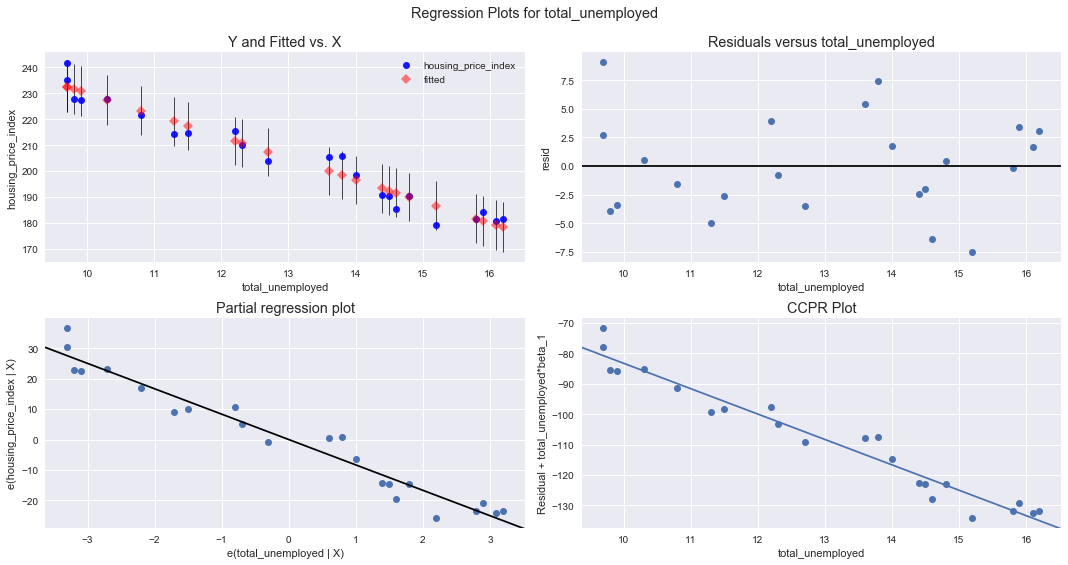

In [10]:
fig